In [46]:
import pandas as pd
import anndata as ad
import numpy as np
import os
import os.path as osp
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
from PIL import Image

In [66]:
CNTDIR = "/home/alma/w-projects/stereoscope/data/molb/st/science"
IMGDIR = "/home/alma/Documents/PhD/papers/STSC/rsc/mob_data/resized_imgs/2000px"
TMATDIR = "/home/alma/Documents/PhD/papers/STSC/rsc/mob_data/tmats"
ODIR = "/home/alma/w-projects/ccf/data/science-mob"

In [75]:
img.size

(1951, 2086)

In [78]:
a = np.asarray(img)
a.transpose(1,0,2)

array([[[226, 203, 221],
        [227, 202, 221],
        [227, 202, 221],
        ...,
        [224, 199, 218],
        [224, 199, 218],
        [224, 199, 218]],

       [[226, 203, 221],
        [226, 203, 221],
        [227, 202, 221],
        ...,
        [224, 199, 218],
        [224, 199, 218],
        [224, 199, 218]],

       [[226, 203, 221],
        [226, 203, 221],
        [226, 203, 221],
        ...,
        [224, 199, 218],
        [224, 199, 218],
        [224, 199, 218]],

       ...,

       [[228, 205, 221],
        [228, 205, 221],
        [228, 205, 221],
        ...,
        [227, 194, 215],
        [227, 194, 215],
        [227, 194, 215]],

       [[228, 205, 221],
        [228, 205, 221],
        [228, 205, 221],
        ...,
        [227, 194, 215],
        [227, 194, 215],
        [227, 194, 215]],

       [[228, 205, 221],
        [228, 205, 221],
        [228, 205, 221],
        ...,
        [227, 194, 215],
        [227, 194, 215],
        [227, 194, 215]]

In [111]:
paths = os.listdir(CNTDIR)
for pth in paths:
        name = pth.split(".")[0]
        df = pd.read_csv(osp.join(DIR,pth),
                         sep = "\t",
                         header = 0,
                         index_col = 0)
        
        
        with open(osp.join(TMATDIR,name + "_transformation.txt"),"r+") as f:
            tmat = np.array(f.readlines()[0].replace("\n","").split(" ")).reshape(3,3).astype(np.float32)
        
        var = pd.DataFrame(df.columns.values,
                   index = df.columns,
                   columns = ["gene"]
                  )
        
        obs = pd.DataFrame(df.index.values,
                           index = df.index,
                           columns = ["spot"],
                          )
        
        img = Image.open(osp.join(IMGDIR,"HE_" + name + ".jpg"))
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        #img = img.transpose(Image.TRANSVERSE)
        img = img.transpose(Image.TRANSPOSE)
        img = img.transpose(Image.ROTATE_270)

        img = np.asarray(img)#.transpose(1,0,2)
        
        images = dict(hires = img)
        scalefactors = dict(tissue_hires_scalef = 0.21,
                            spot_diameter_fullres = 320,
                           )
        
        metadata = dict(sample =name)
        
        uns = dict(spatial = {name:dict(images=images,
                                  scalefactors = scalefactors,
                                  metadata = metadata,
                                 )})
        
        crd = np.array([x.replace("X","").split("x") for x in df.index]).astype(np.float32)
        crd = np.hstack((crd,np.ones((crd.shape[0],1))))
        ncrd = np.dot(crd,tmat)[:,0:2]
        
        adata = ad.AnnData(df.values,
                           var = var,
                           obs = obs,
                           uns = uns
                          )
        adata.obsm["spatial"] = ncrd
        
        adata.write_h5ad(osp.join(ODIR,name + ".h5ad"))


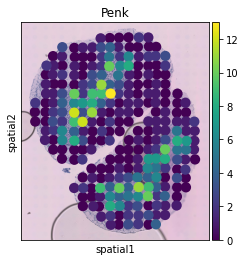

In [109]:
sc.pl.spatial(adata,color ="Penk",alpha = 1)